In [1]:
import pickle
import numpy as np
from sklearn.neural_network import MLPClassifier
from itertools import product as iterproduct
from sklearn.model_selection import GridSearchCV
import pandas as pd 
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn import svm

In [2]:
x = pickle.load( open( "CRM_ALL_Dataset_x.p", "rb" ) )
y = pickle.load( open( "CRM_ALL_Dataset_y.p", "rb" ) )


In [3]:
x.shape

(1355, 3172)

In [4]:
x

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [5]:
y

array([4, 4, 4, ..., 2, 6, 2])

In [6]:
def eval_v2(model, data, target, cv, score = lambda y,yp: np.mean(y==yp) ):
    SCORE = 0
    test_scr = []
    for ind_train, ind_test in cv.split(data,target):
        model.fit(data[ind_train],target[ind_train])
        ypred = model.predict(data[ind_test])
        test_scr.append(score(target[ind_test],ypred))
        SCORE += score(target[ind_test],ypred)
    return SCORE/10,test_scr

In [7]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

X = x
Y = y
# prepare configuration for cross validation test harness
seed = 6
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('MLP', MLPClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
mean_results = []
names = ['LR', 'MLP', 'KNN', 'CART', 'SVM','RF']
scoring = 'accuracy'
for name, model in models:
	cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
	cv_results_mean,cv_results = eval_v2(model, X, Y, cv)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f " % (name, cv_results_mean)
	print(msg)
	mean_results.append((name,cv_results_mean))


LR: 0.816309 
MLP: 0.853352 
KNN: 0.761567 
CART: 0.803703 
SVM: 0.524034 
RF: 0.817072 


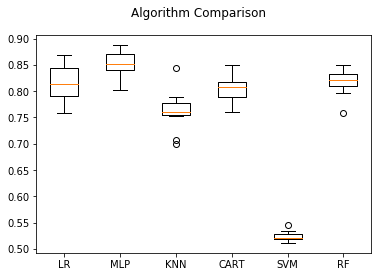

Mean Accuracy of LR: 0.816309 
Mean Accuracy of MLP: 0.853352 
Mean Accuracy of KNN: 0.761567 
Mean Accuracy of CART: 0.803703 
Mean Accuracy of SVM: 0.524034 
Mean Accuracy of RF: 0.817072 


In [8]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
for alg,alg_mean_results  in mean_results:
    msg = "Mean Accuracy of %s: %f " % (alg, alg_mean_results)
    print(msg)